In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

data_dir_base = '/ocean/projects/atm170004p/jakhar/2d_emulator_vision/SSL-for-2D-Turbulence/results/BASE/BASE_seed_0_2phase_1000epochs/analysis/emulate/'
data_dir_truth = '/ocean/projects/atm170004p/jakhar/2d_emulator_vision/SSL-for-2D-Turbulence/results/BASE/BASE_seed_0_2phase_1000epochs/analysis/truth/'
data_dir_mae = '/ocean/projects/atm170004p/jakhar/2d_emulator_vision/SSL-for-2D-Turbulence/results/MAE_FINETUNE/MAE_mr0.5_seed_0_2phase_ft_dropPR/analysis/emulate/'
data_dir_smae = '/ocean/projects/atm170004p/jakhar/2d_emulator_vision/SSL-for-2D-Turbulence/results/SMAE_FINETUNE/SMAE_seed_0_2phase_spatial_pixelonly_targetfull_0031_ft_dropPR/analysis/emulate/'

from analysis.plot_config import params, contourLevels, colormap
plt.rcParams.update(params)


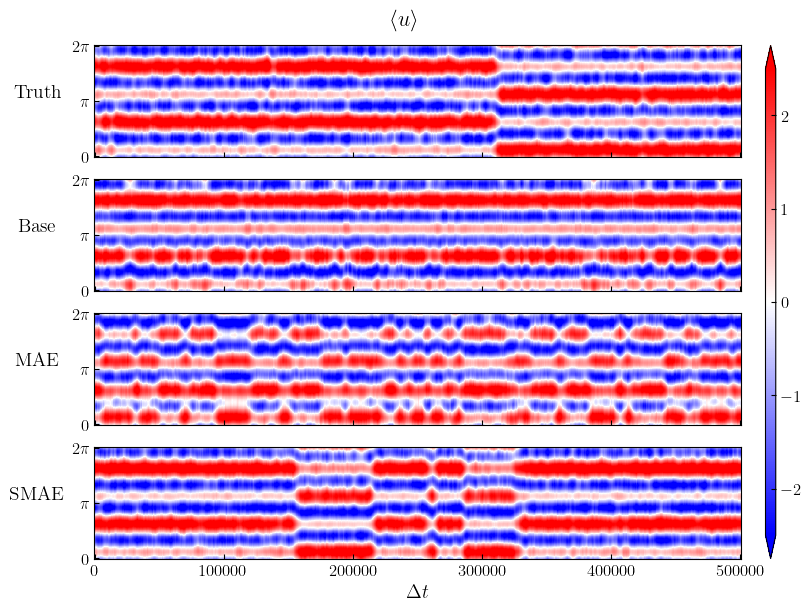

In [6]:
################### Zonal Mean ###################
var = 'U'
subsample = 100

num_snapshots = 500000

window_size = num_snapshots//subsample // 100

Ny = 256
colormap = 'bwr'
contourLevels = 20


fig, axes = plt.subplots(4,1,figsize=(8, 6), layout="compressed")  # Adjust figure size as needed

for count, ax in enumerate(axes.flatten()):
    if count == 0:
        data = np.load(data_dir_truth + 'zonal_' + var + '.npz')
        title = 'Truth'
    elif count == 1:
        data = np.load(data_dir_base + 'zonal_' + var + '.npz')
        title = 'Base'
    elif count == 2:
        data = np.load(data_dir_mae + 'zonal_' + var + '.npz')
        title = 'MAE'
    elif count == 3:
        data = np.load(data_dir_smae + 'zonal_' + var + '.npz')
        title = 'SMAE'

    if var == 'U':
        var_zonal = data['U_zonal']
    elif var == 'V':
        var_zonal = data['V_zonal']
    elif var == 'Omega':
        var_zonal = data['Omega_zonal']

    if count == 0:
        var_zonal = var_zonal[::3, :]

    var_zonal = var_zonal[:num_snapshots,:]
    var_zonal = var_zonal[::subsample, :]

    var_zonal = ndimage.uniform_filter1d(var_zonal, size=window_size, axis=0)


    x_axis = np.linspace(0, var_zonal.shape[0]*subsample, var_zonal.shape[0])
    yaxis = np.linspace(0, 2 * np.pi, Ny)

    vmax = 2.5
    contour = ax.pcolor(x_axis, yaxis, var_zonal.T, cmap=colormap, vmax=vmax, vmin=-vmax)

    if count == 3:
        ax.set_xlabel(r'$\Delta t$')
    else:
        ax.set_xticklabels([])

    ax.set_yticks([0, np.pi, 2*np.pi])
    ax.set_yticklabels(['0', r'$\pi$', r'$2\pi$'])
    # ax.set_ylabel('Y', rotation=0)
    ax.set_ylabel(title, rotation=0, labelpad=25)

# Add a single colorbar for all subplots
cbar = fig.colorbar(contour, ax=axes, shrink=1, aspect=50, pad=0.001, extend='both')
# cbar.set_label(r'$\langle u \rangle$', rotation=0, labelpad=20)

plt.suptitle(r'$\langle u \rangle$')
plt.savefig('zonal_mean_' + var + '.png', dpi=600, bbox_inches='tight')
# Adjust layout
